In [1]:
import segmentation_models_pytorch as smp
import torch
import torchvision
from einops import rearrange
from matplotlib import pyplot as plt
from torch import nn
from torchvision import transforms
from tqdm.auto import tqdm
from vision_architectures.schedulers.noise import LinearNoiseScheduler

Load the datasets

In [2]:
transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
    ]
)

In [3]:
train_dataset = torchvision.datasets.MNIST(r"/raid/arjun/MNIST/", train=True, transform=transforms)
train_dataset


Dataset MNIST
    Number of datapoints: 60000
    Root location: /raid/arjun/MNIST/
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [4]:
val_dataset = torchvision.datasets.MNIST(r"/raid/arjun/MNIST/", train=False, transform=transforms)
val_dataset


Dataset MNIST
    Number of datapoints: 10000
    Root location: /raid/arjun/MNIST/
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [5]:
dataset = train_dataset + val_dataset
dataset, len(dataset)

(<torch.utils.data.dataset.ConcatDataset object at 0x7f23d45babd0>, 70000)

Visualize the dataset

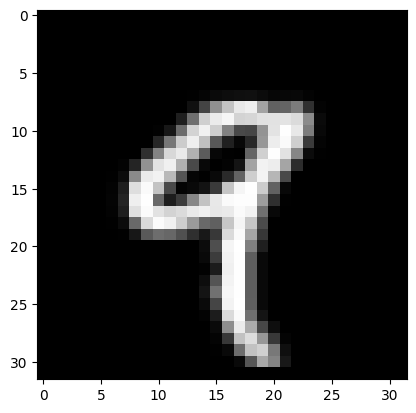

9

In [6]:
img, gt = dataset[4]

plt.imshow(rearrange(img, "c h w -> h w c"), cmap="gray")
plt.show()
gt

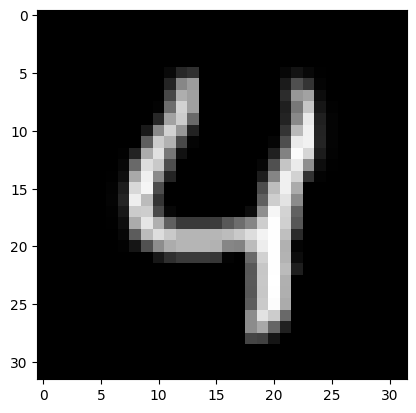

4

In [7]:
img, gt = dataset[60004]

plt.imshow(rearrange(img, "c h w -> h w c"), cmap="gray")
plt.show()
gt

Visualize some outputs

t = tensor([1], dtype=torch.int32)


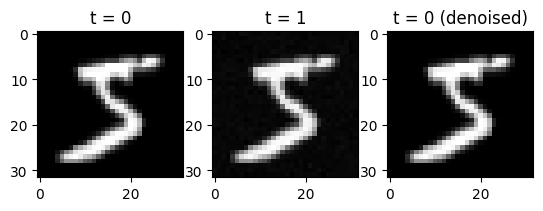


t = tensor([20], dtype=torch.int32)


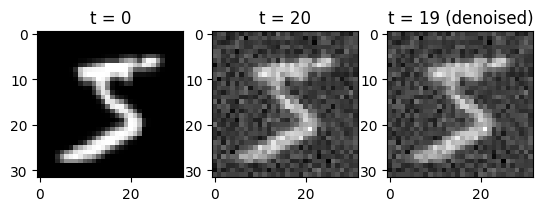


t = tensor([40], dtype=torch.int32)


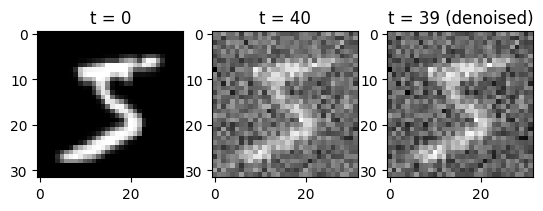


t = tensor([60], dtype=torch.int32)


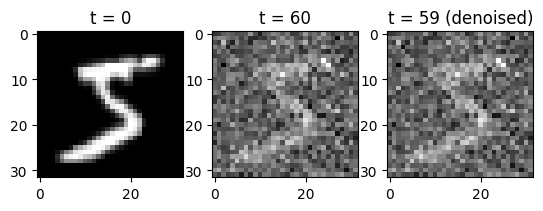


t = tensor([80], dtype=torch.int32)


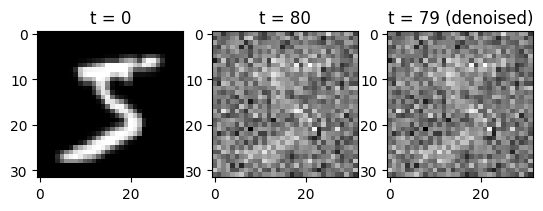


t = tensor([100], dtype=torch.int32)


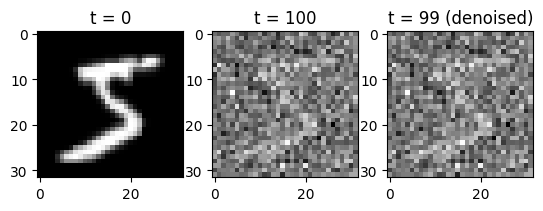


t = tensor([120], dtype=torch.int32)


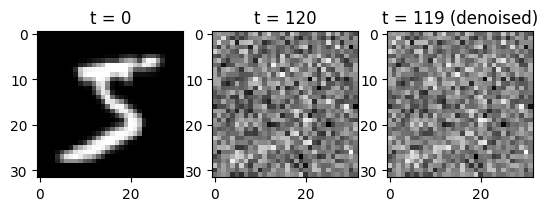


t = tensor([140], dtype=torch.int32)


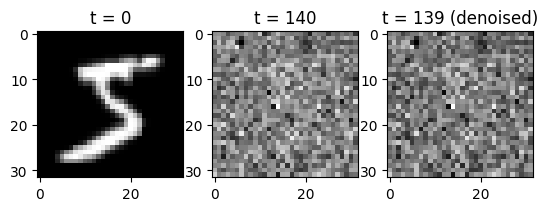


t = tensor([160], dtype=torch.int32)


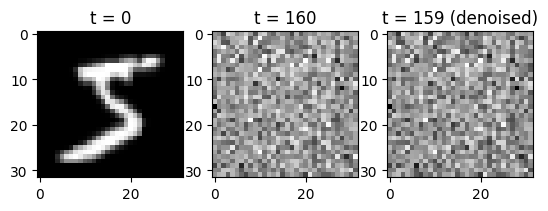


t = tensor([180], dtype=torch.int32)


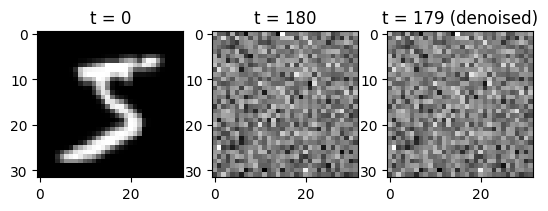


t = tensor([200], dtype=torch.int32)


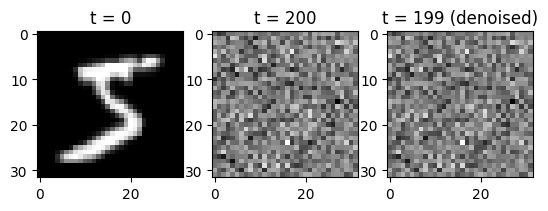

In [8]:
T = 200
num_timesteps = 11
timesteps = torch.linspace(1, T, num_timesteps)

x0, gt = dataset[0]
x0.unsqueeze_(0)
scheduler = LinearNoiseScheduler(T)

for i in range(num_timesteps):
    t = timesteps[i : i + 1].int()

    xt, noise = scheduler.add_noise(x0, t)

    x0_bar, xt_minus_1 = scheduler.remove_noise(xt, noise, t)

    fig, ax = plt.subplots(1, 3)

    print(f"t = {t}")
    # print(f'denoising mean = {mean}')

    ax[0].imshow(rearrange(x0, "1 c h w -> h w c"), cmap="gray")
    ax[0].set_title("t = 0")
    ax[1].imshow(rearrange(xt, "1 c h w -> h w c"), cmap="gray")
    ax[1].set_title(f"t = {int(t)}")
    ax[2].imshow(rearrange(xt_minus_1, "1 c h w -> h w c"), cmap="gray")
    ax[2].set_title(f"t = {int(t - 1)} (denoised)")
    plt.show()

    print()

Train model

In [25]:
class SimpleArchitecture(nn.Module):
    # Does not perform any time embedding

    def __init__(self):
        super().__init__()

        self.model = smp.Unet(
            encoder_name="resnet18",
            in_channels=1,
            classes=1,
            encoder_depth=1,
            decoder_channels=(64,),
            # decoder_channels=(64, 32, 16),
            # activation="tanh",
        )

    def forward(self, xt):
        return self.model(xt)

In [26]:
device = torch.device("cuda:0")

In [27]:
model = SimpleArchitecture()
model.to(device)
sum([parameter.numel() for parameter in model.parameters()])

11244801

In [28]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()

In [29]:
T = 200
noise_scheduler = LinearNoiseScheduler(T)
noise_scheduler.to(device)

LinearNoiseScheduler()

In [30]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=15000, shuffle=True, pin_memory=True)
len(dataloader)

5

Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/5 [00:00<?, ?it/s]

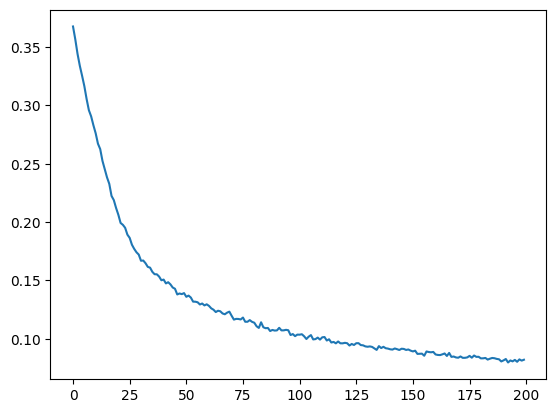

In [34]:
num_epochs = 200
model.train()

losses = []
for _ in tqdm(range(num_epochs), "Epoch"):
    for batch in tqdm(dataloader, "Batch", leave=False):
        x0, gts = batch
        x0 = x0.to(device)

        t = torch.randint(1, T, (x0.shape[0],), device=device)

        xt, noise_gt = noise_scheduler.add_noise(x0, t)

        optimizer.zero_grad()
        noise_pred = model(xt)

        loss = criterion(noise_pred, noise_gt)
        loss.backward()
        optimizer.step()

    losses.append(loss.detach().cpu())

plt.plot(losses)
plt.show()

Generate images

t = tensor([200], device='cuda:0')


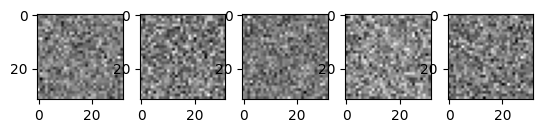

t = tensor([160], device='cuda:0')


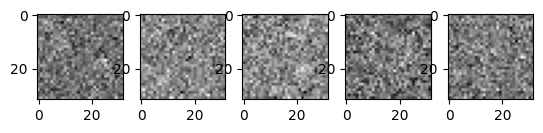

t = tensor([120], device='cuda:0')


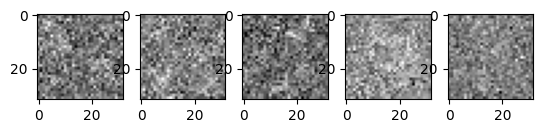

t = tensor([80], device='cuda:0')


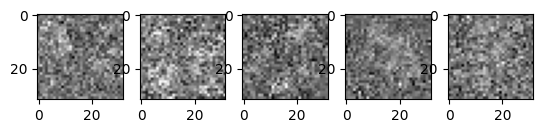

t = tensor([40], device='cuda:0')


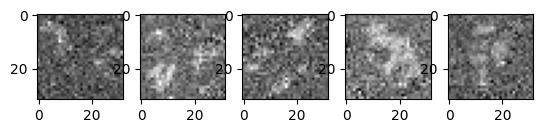

t = tensor([1], device='cuda:0')


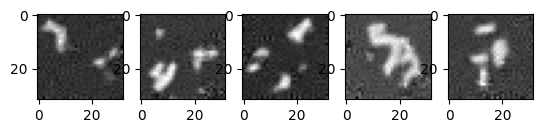

In [35]:
model.eval()

xt = torch.randn((5, 1, 32, 32), device=device)

for t in reversed(range(1, T + 1)):
    t = torch.tensor([t], device=device)

    pred = model(xt)

    x0_bar, xt_minus_1 = noise_scheduler.remove_noise(xt, pred, t)
    xt = xt_minus_1  # This will be the new xt

    x0_bar = x0_bar.detach().cpu()
    xt_minus_1 = xt_minus_1.detach().cpu()

    if t % 40 == 0 or t == 1:
        print(f"t = {t}")
        fig, ax = plt.subplots(1, xt.shape[0])
        for i in range(xt.shape[0]):
            ax[i].imshow(rearrange(xt_minus_1[i], "c h w -> h w c"), cmap="gray")
        plt.show()